# Heart failure prediction

github - https://github.com/pramodhgopal/Heart-Disease-Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, accounting for over 31% of all deaths worldwide. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. The most common of these disorders affecting people is heart disease. Considering how prevelant it is, identifying those at highest risk of heart disease and ensuring they receive appropriate treatment can prevent premature deaths. That is the purpose of this project. We will observe a dataset from the Kaggle website about heart disease, perform some exploratory data analysis on and try to come up with some classification models to predict people at risk of heart disease. 

As mentioned, our aim is to classify/predict whether a patient is prone to heart failure depending on multiple attributes. For the purposes of this project, we will be using the Heart Failure Prediction Dataset from kaggle provided by the user fedesoriano (link - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?datasetId=1582403). This is going to be a classification problem and we will be building different classification models and try to see which model might be the best fit for this use case.

We shall start by importing the required libraries and taking a look at the dataset (I downloaded the dataset to my local folder and read the csv from the folder).

## Import libraries and inital exploration

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV

df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Lets look at the columns of this dataset and try to understand what the attributes are measuring and metrics with which they were measured. As per the link listed above, the data attributes are:
- **Age**: age of the patient [years]
- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]

We can see the first five rows of the dataset. Lets see how many total rows there are in the table. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see that there are 918 entries or rows in the dataset and that are no null values in any of the attributes. We also see that some of the attributes are in object format rather than string, which will affect our analysis. So lets convert them to strings first and from here, we will conduct some exploratory data analysis.

In [3]:
col = df.select_dtypes(include="object").columns
df[col]=df[col].astype("string")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


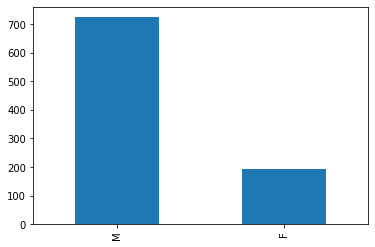

In [4]:
df['Sex'].value_counts().plot.bar()

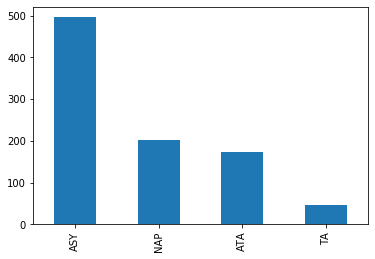

In [6]:
df['ChestPainType'].value_counts().plot.bar()

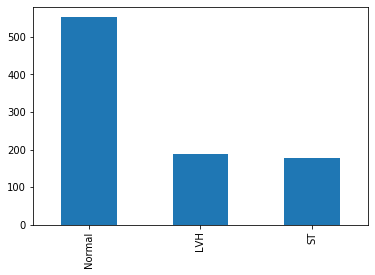

In [7]:
df['RestingECG'].value_counts().plot.bar()

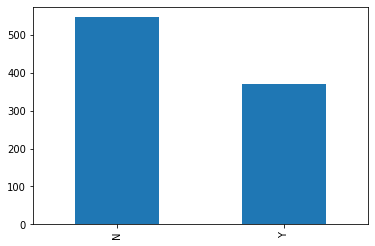

In [8]:
df['ExerciseAngina'].value_counts().plot.bar()

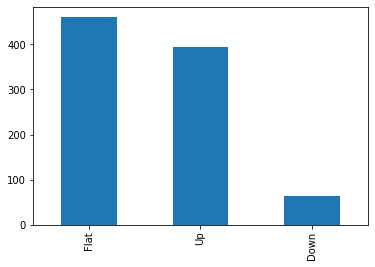

In [9]:
df['ST_Slope'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7B4D9E8C8>,
      dtype=object)

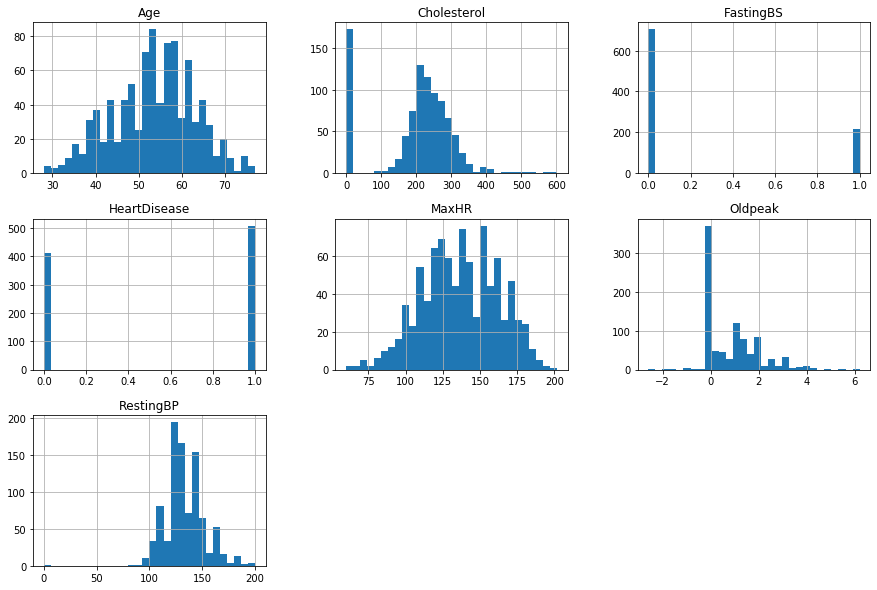

In [10]:
df.hist(bins=30, figsize=(15, 10))

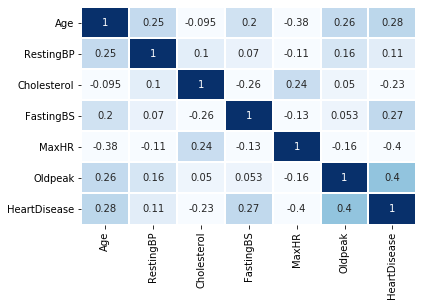

In [11]:
sns.heatmap(df.corr(), cbar=0, linewidths=1,vmax=1, vmin=0, annot =True, cmap='Blues')

In the heatmap, we can see the categorical columns are omitted as they have string values and not numerical values. So lets relabel the categorical columns and see if we can see the correlation of all the columns.

In [12]:
df2 = df.apply(LabelEncoder().fit_transform)
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


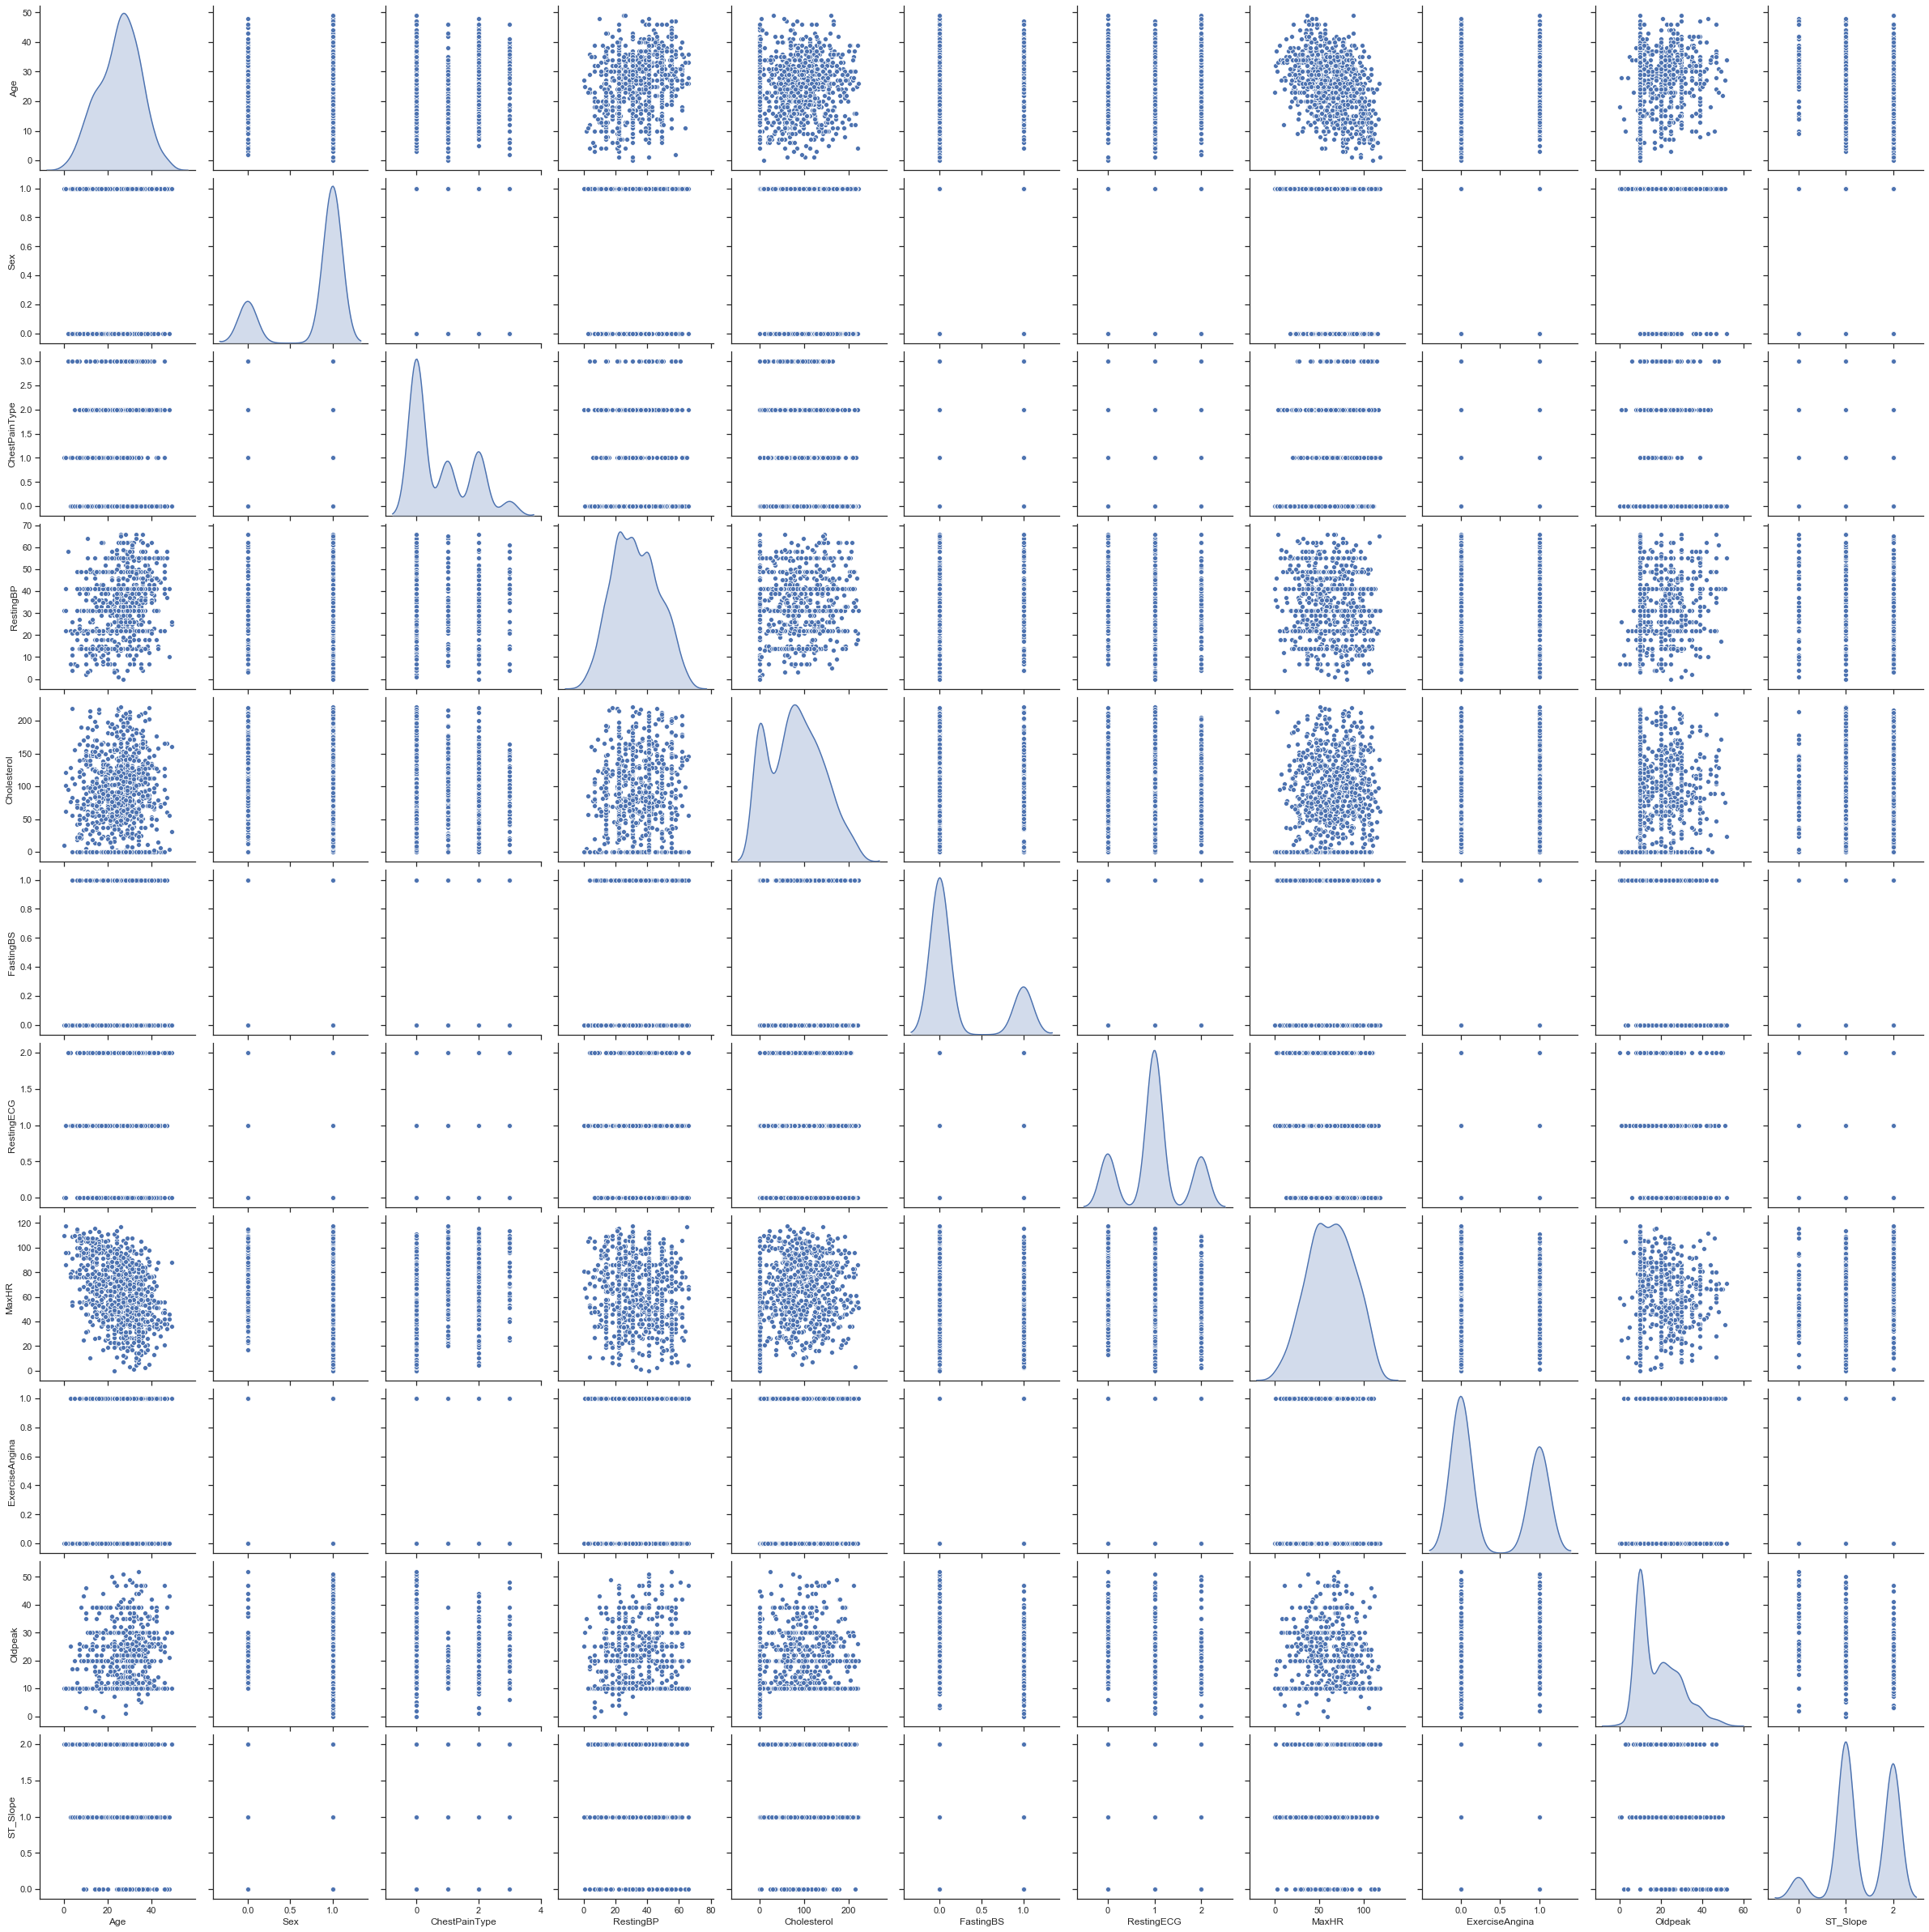

In [13]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df2, diag_kind="kde", vars = df2.columns[0:11], height=3)

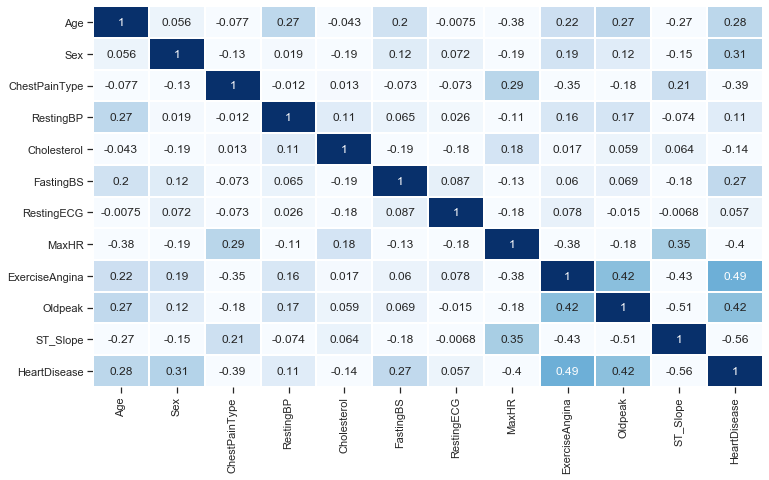

In [14]:
plt.figure(figsize = (12,7))
sns.heatmap(df2.corr(), cbar=0, linewidths=1,vmax=1, vmin=0, annot =True, cmap='Blues')

The correlation values are all really small. However, for the purposes of this project we will keep our threshold at 0.3, i.e. any value from the above map that has a value of 0.3 or greater should be considered for our model. This should also include the negative values because negative correlation simply means that as one feature increases, the other feature decreases. Therefore, it is still useful if the magnitude of the correlation is significant and the feature is not highly correlated with other features. From this correlation map and our threshold of 0.3, we will eliminate using the following columns for our model- Age, FastingBS, RestingBP, RestingECG and Cholesterol.

Below we will set up the features and target along with the train and test split. Since we are attempting to predict if a patient has a heart diease or not, the problem becomes a binary classification problem. There are many models that we can use for a classification problem. We will use these models to compare how they perform against each other. For the sake of this project, we will be taking a look at the logarithmic model, decision tree classifier, AdaBoost and a non linear svm. We can take a look at the score of each model and decide which might be the best fit for our use case.

## Modeling

In [15]:
features = df2[df2.columns.drop(['Age', 'FastingBS','RestingBP','RestingECG', 'Cholesterol', 'HeartDisease'])].values
target = df2['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

### Logarithmic model

In [33]:
logModel = LogisticRegression(random_state=0)
logModel.fit(x_train, y_train)
logModel.coef_

array([[ 1.43277778, -0.62222085, -0.01572787,  0.87839613,  0.04619552,
        -1.70817839]])

In [34]:
prediction = logModel.predict(x_test)
confMatrix = confusion_matrix(y_test,prediction)
print(confMatrix)

[[74 15]
 [16 79]]


In [35]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,prediction)))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,prediction)))

Accuracy :  83.15%
Recall :  83.16%
f1_score :  83.60%


In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        89
           1       0.84      0.83      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



ROC_AUC Score :  83.15%


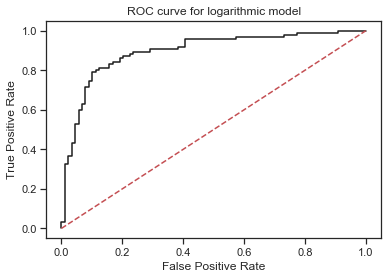

In [37]:
ypp = logModel.predict_proba(x_test)
fpr, tpr, th = roc_curve(y_test, ypp[:,1])
auc = roc_auc_score(y_test, ypp[:,1])
plt.plot(fpr,tpr,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1), 'r--')
plt.title('ROC curve for logarithmic model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

### Decision tree classifier

In [38]:
dtModel = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dtModel.fit(x_train, y_train)
pred2 = dtModel.predict(x_test)

In [39]:
dt_confMatrix = confusion_matrix(y_test,pred2)
print(dt_confMatrix)

[[76 13]
 [16 79]]


In [40]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,pred2)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,pred2)))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,pred2)))

Accuracy :  84.24%
Recall :  83.16%
f1_score :  84.49%


In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        89
           1       0.84      0.83      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



ROC_AUC Score :  84.28%


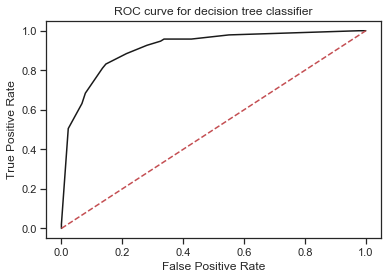

In [42]:
ypp2 = dtModel.predict_proba(x_test)
fpr2, tpr2, th2 = roc_curve(y_test, ypp2[:,1])
auc = roc_auc_score(y_test, ypp2[:,1])
plt.plot(fpr2,tpr2,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1), 'r--')
plt.title('ROC curve for decision tree classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,pred2)))

### AdaBoost

In [82]:
clf = AdaBoostClassifier(n_estimators=100, random_state = 1234)
clf.fit(x_train, y_train)
clf_stg_score = clf.staged_score(x_train, y_train)
clf_score = clf.score(x_train, y_train)
clf_score

0.8732970027247956

In [83]:
clf_pred = clf.predict(x_test)

clf_Matrix = confusion_matrix(y_test, clf_pred)
print(clf_Matrix)

[[71 18]
 [16 79]]


In [84]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,clf_pred)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,clf_pred)))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,clf_pred)))

Accuracy :  81.52%
Recall :  83.16%
f1_score :  82.29%


ROC_AUC Score :  81.47%


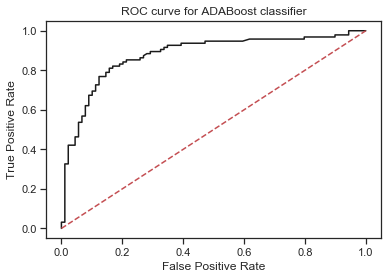

In [85]:
ypp3 = clf.predict_proba(x_test)
fpr3, tpr3, th3 = roc_curve(y_test, ypp3[:,1])
auc = roc_auc_score(y_test, ypp3[:,1])
plt.plot(fpr3,tpr3,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1), 'r--')
plt.title('ROC curve for ADABoost classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,clf_pred)))

### Nonlinear SVM

In [86]:
svc = LinearSVC(C = 4, loss = 'squared_hinge', penalty = 'l2')
svc_clf = CalibratedClassifierCV(svc) 
svc_clf.fit(x_train, y_train)
svc_pred = svc_clf.predict(x_test)

C:\Users\pramo\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pramo\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pramo\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pramo\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pramo\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarni

In [87]:
svc_Matrix = confusion_matrix(y_test, svc_pred)
print(svc_Matrix)

[[73 16]
 [17 78]]


In [88]:
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,svc_pred)))
print("Recall : ",'{0:.2%}'.format(recall_score(y_test,svc_pred)))
print("f1_score : ",'{0:.2%}'.format(f1_score(y_test,svc_pred)))

Accuracy :  82.07%
Recall :  82.11%
f1_score :  82.54%


ROC_AUC Score :  82.06%


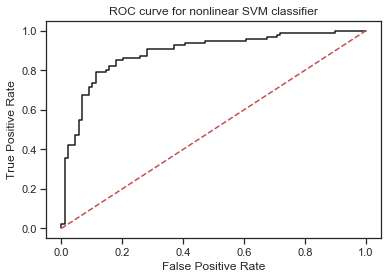

In [89]:
ypp4 = svc_clf.predict_proba(x_test)
fpr4, tpr4, th4 = roc_curve(y_test, ypp4[:,1])
auc = roc_auc_score(y_test, ypp4[:,1])
plt.plot(fpr4,tpr4,'k-')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1), 'r--')
plt.title('ROC curve for nonlinear SVM classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,svc_pred)))

## Findings and conclusion

Lets look at the confusion matrix of these models.

In [90]:
print("Log confusion matrix\n",confMatrix)
print()
print("Decision tree confusion matrix\n", dt_confMatrix)
print()
print("ADAboost confusion matrix \n", clf_Matrix)
print()
print("Nonlinear SVC confusion matrix \n", svc_Matrix)

Log confusion matrix
 [[74 15]
 [16 79]]

Decision tree confusion matrix
 [[76 13]
 [16 79]]

ADAboost confusion matrix 
 [[71 18]
 [16 79]]

Nonlinear SVC confusion matrix 
 [[73 16]
 [17 78]]


Now that we have implemented the different models, lets take a look at some of the metrics from the models. We will compare the accuracy, recall f1- score and the ROC AUC curve of these models and see how they perform.

 |Sno. | Algortihm  | Accuracy    | Recall   | F1-score | ROC AUC score |
|---:|:-------------|:-----------|:------|:------|:------|
| 1 | Logarithmic  | 83.15%     | 83.16%   | 83.60%    |   83.15%  |
| 2 | Decision tree classifier  | 84.24%    | 83.16%  | 84.49%     |  84.28%   |
| 3 | Adaboost | 81.52%   | 83.16%   | 82.29%     |  81.47%     |
| 4 | Non linear Svm  | 82.07%   | 82.11%  | 82.54%     | 82.06%     |

From the table above, we can make the following conclusions. 
 - We can see that all the models except for non linear svm have the same recall score. This indicates that they are all equally good at identifying positive cases.
 - The decision tree classifier model has the highest F1-score of 84.49%, suggesting a good balance between precision and recall.
 - Adaboost model has the lowest F1-score of 82.29%. 
 - Decision tree classifier has the highest ROC AUC score and accuracy as well.
 - All the metrics are in the low 80s, which suggests that all these models could be improved in the future.
 
It is also important to note that from the confusion matrixes, the decision tree classifier predicted the least amount of false negatives at 13. In context of this dataset, false negatives occur when the model predicts that a person does not have heart disease when in fact they do. This can result in a delayed or missed diagnosis, which could have serious consequences for the patient's health. So it makes sense that we should pick the model with the least amount of false negatives. Based on these conclusions and the metrics, I think we can say that the decision tree classifier might be the best fit model for this use case as it has the highest accuracy, F1-score and ROC AUC score. 